In [1]:
%matplotlib inline

# General packages for system, time, etc
import os, time, csv, sys
import datetime
from datetime import date
import glob

# scitnific computing and plotting
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns

# HDDM related packages
import pymc as pm
import hddm
import kabuki
import arviz as az

# parallel processing related
from p_tqdm import p_map
from functools import partial

#from HDDMarviz import HDDMarviz
#from InferenceDataFromHDDM import InferenceDataFromHDDM
#from plot_ppc_by_cond import plot_ppc_by_cond

/opt/conda/lib/python3.8/site-packages/IPython/parallel.py:12: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  warn("The `IPython.parallel` package has been deprecated since IPython 4.0. "


In [2]:
data = pd.read_csv('/home/jovyan/hddm_data.csv')
data = hddm.utils.flip_errors(data)

In [3]:
def ms3(id, data=None, samples=None, burn=None, save_name="t_model"): 
    """This function instantiate model object passing it our data and tailoring an 
    individual hierarchical DDM around our dataset.It finds a good starting point
    which helps with the convergence.""" 
    
    print('running model%i'%id);
    
    import hddm
    
    dbname = save_name + '_chain_%i.db'%id 
    mname  = save_name + '_chain_%i'%id
    m =  hddm.HDDM(data, depends_on={'t': 'Condition'})
    m.find_starting_values()
    m.sample(samples, burn=burn, dbname=dbname, db='pickle') # it's neccessary to save the model data
    m.save(mname)
    
    return m

In [4]:
#pmap is to run multiple chains at once 
samples = 5000  # Cavanagh used 30,000 and 10, 000 burn.
burn = 1500    
thin = 1
chains = 2

model_3 = p_map(partial(ms3, data=data, samples=samples, burn=burn),
                 range(chains))

  0%|          | 0/2 [00:00<?, ?it/s]

running model0
running model1


/opt/conda/lib/python3.8/site-packages/scipy/optimize/optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.8/site-packages/scipy/optimize/optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [                  0%                  ] 2 of 5000 complete in 3.6 sec[                  0%                  ] 2 of 5000 complete in 3.5 sec[                  0%                  ] 3 of 5000 complete in 8.1 sec[                  0%                  ] 3 of 5000 complete in 9.2 sec[                  0%                  ] 4 of 5000 complete in 14.1 sec[                  0%                  ] 4 of 5000 complete in 15.3 sec[                  0%                  ] 5 of 5000 complete in 20.0 sec[                  0%                  ] 5 of 5000 complete in 20.9 sec[                  0%                  ] 6 of 5000 complete in 27.9 sec[                  0%                  ] 6 of 5000 complete in 28.4 sec[                  0%                  ] 7 of 5000 complete in 38.7 sec[                  0%                  ] 7 of 5000 complete in 38.8 sec[                  0%                  ] 8 of 5000 complete in 45.2 sec[                  0%                  ] 8 of 5000 complete in 46.2 sec[        

In [6]:
stats = model_3[0].gen_stats()
stats

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,2.323506,0.069514,2.192388,2.277048,2.319845,2.369886,2.468172,0.001332
a_std,0.66373,0.055461,0.567577,0.624833,0.659197,0.69741,0.780986,0.001205
a_subj.102,2.668531,0.153641,2.387378,2.561315,2.666065,2.767392,2.99087,0.004099
a_subj.103,1.799537,0.095835,1.615088,1.734157,1.800332,1.8637,1.989369,0.00242
a_subj.104,2.850312,0.169467,2.546389,2.734174,2.841075,2.959834,3.217453,0.004772
...,...,...,...,...,...,...,...,...
t_subj(sad).271,0.605909,0.040443,0.521251,0.580056,0.608161,0.633496,0.683348,0.000896
t_subj(sad).273,0.538125,0.029502,0.474896,0.519364,0.540075,0.559176,0.590104,0.00076
t_subj(sad).275,0.964399,0.149442,0.643952,0.871513,0.972813,1.067791,1.22945,0.002953
t_subj(sad).277,0.432095,0.024672,0.377843,0.417506,0.433928,0.449279,0.474938,0.000575


In [12]:
display(stats.loc[['a']])
display(stats.loc[['a_std']])
display(stats.loc[['v']])
display(stats.loc[['v_std']])
display(stats.loc[['t(sad)']])
display(stats.loc[['t(happy)']])
display(stats.loc[['t(neutral)']])
display(stats.loc[['t_std']])

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,2.323506,0.069514,2.192388,2.277048,2.319845,2.369886,2.468172,0.001332


,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a_std,0.66373,0.055461,0.567577,0.624833,0.659197,0.69741,0.780986,0.001205


,mean,std,2.5q,25q,50q,75q,97.5q,mc err
v,-0.005937,0.012653,-0.031211,-0.014224,-0.005898,0.002503,0.019107,0.000384


,mean,std,2.5q,25q,50q,75q,97.5q,mc err
v_std,0.080841,0.014878,0.051947,0.070671,0.080246,0.090821,0.110967,0.000831


,mean,std,2.5q,25q,50q,75q,97.5q,mc err
t(sad),0.728283,0.059238,0.616158,0.688615,0.727001,0.767763,0.847212,0.001249


,mean,std,2.5q,25q,50q,75q,97.5q,mc err
t(happy),0.695861,0.05214,0.595655,0.660011,0.695144,0.730393,0.800303,0.001115


,mean,std,2.5q,25q,50q,75q,97.5q,mc err
t(neutral),0.673947,0.054097,0.568643,0.637692,0.674148,0.708909,0.784154,0.000996


,mean,std,2.5q,25q,50q,75q,97.5q,mc err
t_std,0.328877,0.029436,0.277217,0.308277,0.326793,0.347372,0.391137,0.000664


Plotting a
Plotting v


Text(0.0, 1.0, 'Posterior of HDDM Parameters')

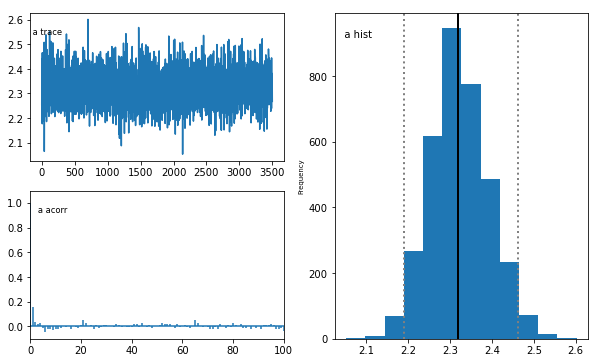

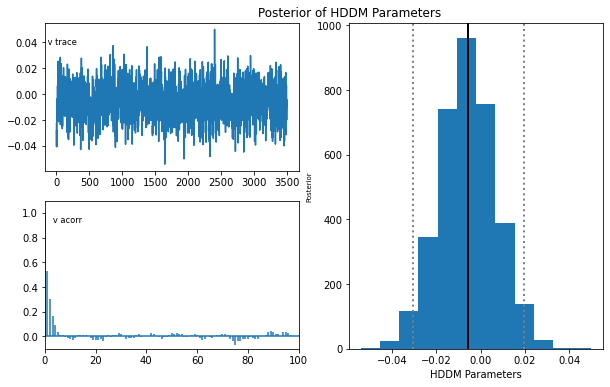

In [14]:
model_3[0].plot_posteriors(['a', 't(happy)','t(sad)', 't(neutral)', 'v'])

plt.xlabel('HDDM Parameters')
plt.ylabel('Posterior')
plt.title('Posterior of HDDM Parameters')

Text(0.5, 1.0, 'Posterior Predictive Plot')

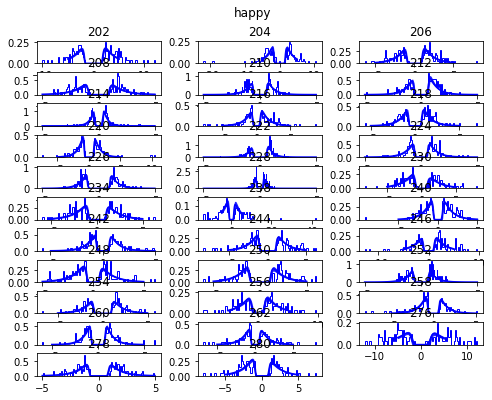

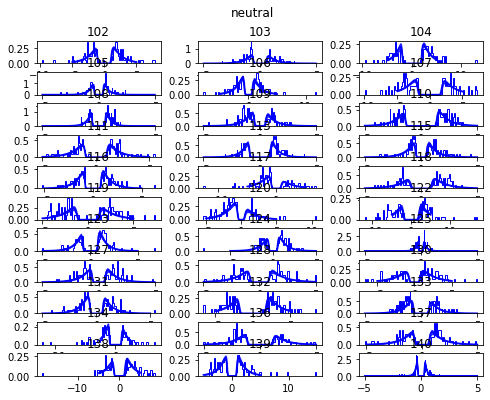

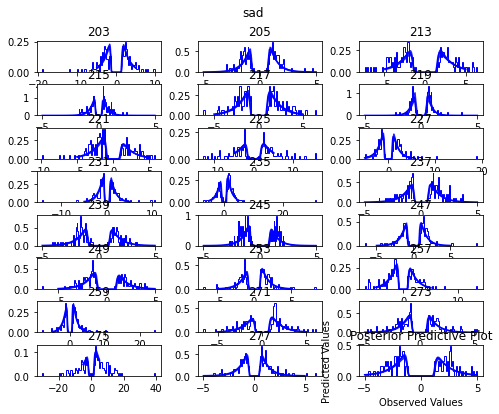

In [15]:
hddm.analyze.gelman_rubin(model_3)
model_3[0].plot_posterior_predictive()

plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Posterior Predictive Plot')

In [26]:
hddm.analyze.gelman_rubin(model_3)

{'a': 1.0005383018463403,
 'a_std': 0.9998778646682712,
 'a_subj.102': 1.0020435592681385,
 'a_subj.103': 0.9998635919600983,
 'a_subj.104': 1.001703857444241,
 'a_subj.105': 0.999859077572643,
 'a_subj.106': 1.0013123018829697,
 'a_subj.107': 0.9998711035363245,
 'a_subj.108': 0.9998712784978129,
 'a_subj.109': 0.9998669590651532,
 'a_subj.110': 0.9998608906293801,
 'a_subj.111': 1.000202988393565,
 'a_subj.113': 1.002488589125137,
 'a_subj.115': 1.0004107001897578,
 'a_subj.116': 0.9998602245182784,
 'a_subj.117': 1.000510098630216,
 'a_subj.118': 1.0002217727601752,
 'a_subj.119': 1.001422935586819,
 'a_subj.120': 1.000947598729476,
 'a_subj.122': 1.0009237956191068,
 'a_subj.123': 1.0044242951187394,
 'a_subj.124': 1.002014795322006,
 'a_subj.125': 1.0001072870942174,
 'a_subj.127': 1.000392586087513,
 'a_subj.128': 1.0010342820506832,
 'a_subj.130': 0.9999025720305252,
 'a_subj.131': 1.0006757075357975,
 'a_subj.132': 1.0003011354514115,
 'a_subj.133': 1.0002106153119557,
 'a_subj

Text(0.5, 1.0, 'Combined Posterior Predictive Plot')

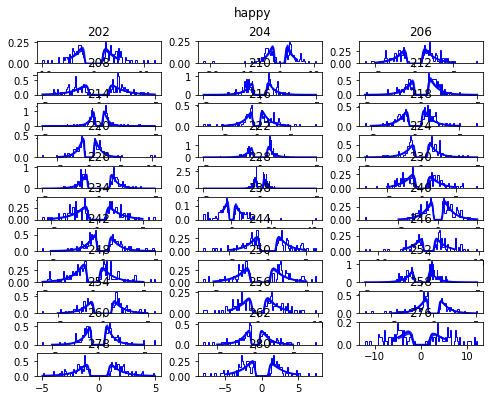

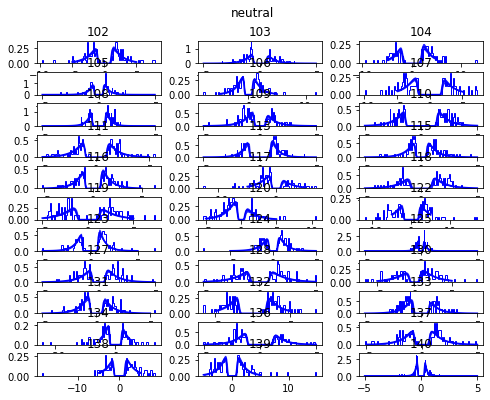

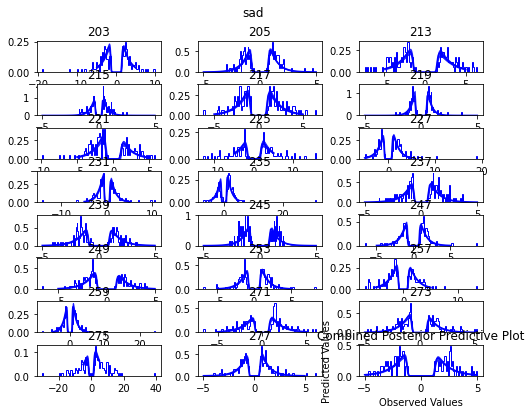

In [16]:
m_comb = kabuki.utils.concat_models(model_3) # combine four chains together
m_comb.plot_posterior_predictive()

plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Combined Posterior Predictive Plot')

In [17]:
print("Simple model DIC: %f" % model_3[0].dic)

Simple model DIC: 38659.720947


In [18]:
print("Simple model DIC: %f" % model_3[1].dic)

Simple model DIC: 38664.442639


Text(0.5, 1.0, 'Posterior of non-decision time group means')

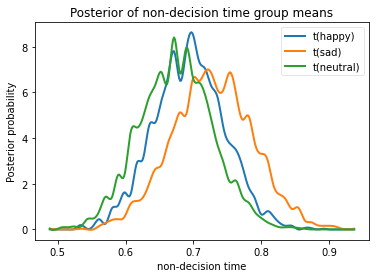

In [27]:
#how does it know which is which?
v_happy, v_sad, v_neutral = model_3[1].nodes_db.node[['t(happy)','t(sad)', 't(neutral)']]
hddm.analyze.plot_posterior_nodes([v_happy, v_sad, v_neutral])
plt.xlabel('non-decision time')
plt.ylabel('Posterior probability')
plt.title('Posterior of non-decision time group means')

Text(0.5, 1.0, 'Posterior of non-decision time group means')

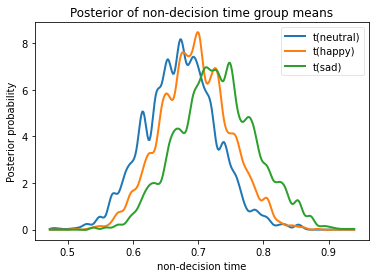

In [30]:
#how does it know which is which?
v_neutral, v_happy, v_sad = model_3[0].nodes_db.node[['t(neutral)','t(happy)', 't(sad)']]
hddm.analyze.plot_posterior_nodes([v_neutral, v_happy, v_sad])
plt.xlabel('non-decision time')
plt.ylabel('Posterior probability')
plt.title('Posterior of non-decision time group means')

In [28]:
#check if drift rate for happy/sad are larger than neutral - bayeasian t-test
print("P(Happy > Neutral) = ", (v_happy.trace() > v_neutral.trace()).mean())
print("P(Sad > Neutral) = ", (v_sad.trace() > v_neutral.trace()).mean())

P(Happy > Neutral) =  0.6037142857142858
P(Sad > Neutral) =  0.7514285714285714


Text(0.5, 1.0, 'Combined Posterior Predictive Plot')

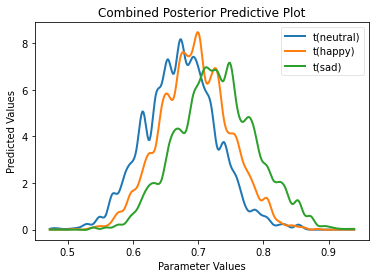

In [31]:
hddm.analyze.plot_posterior_nodes(model_3[0].nodes_db.loc[['t(neutral)','t(happy)','t(sad)'], 'node'])

plt.xlabel('Parameter Values')
plt.ylabel('Predicted Values')
plt.title('Combined Posterior Predictive Plot')